### Урок 5 
Проверка статистических гипотез. P-значения. Доверительные интервалы. A/B-тестирование

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

Задача 1
Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

$H_0$ - шарики могут иметь средний диаметр 17мм

$H_a$ - шарики имеют другой средний диаметр, больше 17мм
* Правосторонняя область: $\Omega_\alpha = (t_{1 - \alpha}, \infty)$.



[16.93531813 20.03469081 15.82043399 14.63496092 16.11709216 14.62070427
 13.82020238 17.87386377 14.29398792 19.25685166 16.31124346 17.91547821
 17.44157319 16.4918998  17.86067331 19.01351799 13.44798311 20.09700753
 20.19665051 22.17921549 16.1990757  17.11577471 15.89187188 16.79579231
 16.98097956 15.8136654  16.7169549  15.49617615 13.47546184 17.09037519
 17.86010615 17.54187037 13.38043418 16.17842242 14.46844056 12.65286788
 17.72306468 20.11375673 16.5975047  14.10282154 17.60850956 17.6747227
 17.17834749 18.38883505 17.70391977 21.37555535 19.49431654 18.86387213
 17.47966561 16.29775713 17.51581418 17.43292836 17.75091828 18.72164966
 13.44313478 17.17203062 15.23443608 21.54138963 18.18318211 18.25535335
 19.71017181 11.67769604 18.22569122 17.01309788 18.15415064 15.49688232
 16.45112207 14.77399965 17.50995067 15.73201724 19.09991073 15.01854642
 13.38852424 18.63721261 14.44443555 15.04978622 14.38055498 21.67610546
 18.75685877 19.94759147 15.3573125  15.95714568 22.

(array([ 2.,  7.,  8.,  9., 18., 25., 14.,  8.,  4.,  5.]),
 array([11.47656534, 12.54683035, 13.61709537, 14.68736038, 15.7576254 ,
        16.82789041, 17.89815543, 18.96842044, 20.03868546, 21.10895047,
        22.17921549]),
 <a list of 10 Patch objects>)

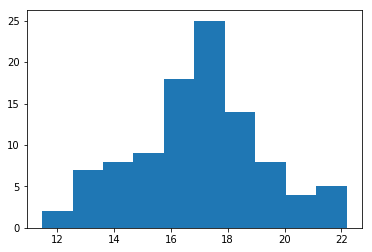

In [60]:
H0 = 17
Ha = 17.5
Pa = 0.025
n = 100
Dx = 4


sigma = np.sqrt(Dx)
samples = np.random.normal(H0, sigma, size=n)
print(samples)
plt.hist(samples)

В нашем случае статистика имеет вид:
$$T(X) = \dfrac{\overline{X} - 17}{1 / 17,5} = 17,5 \cdot (\overline{X} - 17).$$
$\alpha = 0.025$.
$$\Omega_\alpha =  (t_{1 - \alpha/2}, \infty).$$
$$\Omega_\alpha =  (2, \infty).$$


In [61]:
mean = samples.mean()
mean

17.008809212182495

In [62]:
Tx = 0
Tx = 17.5 * (mean - 17)
print(Tx)
if Tx >= sigma:
    print("Верна альтернативная гипотеза: шарики имеют другой средний диаметр, больше 17мм ")
else:
    print("Верна нулевая гипотеза: шарики могут иметь средний диаметр 17мм ") 

0.15416121319366205
Верна нулевая гипотеза: шарики могут иметь средний диаметр 17мм 


In [55]:
stats.norm.ppf(Pa )

-1.9599639845400545

Задача 2
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания a с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [66]:
sigma = 16
p = 0.95
mean = 80
n = 256
#t = 2.2622

из центральной предельной теоремы мы знаем, что распределение выборочного среднего достаточно похоже на нормальное распределение с параметрами $a = M(X)$ и $\sigma = \sqrt{\dfrac{D(X)}{n}}$.

Математическое ожидание и дисперсию можно теперь оценить, используя выборочное среднее `mean`. Зафиксируем теперь уровень доверия $p = 0.95$. Тогда доверительный интервал:

In [64]:
(mean - 2 * np.sqrt(mean / n), mean + 2 * np.sqrt(mean / n))
# Данный ответ справедлив для распределения Пуассона

(78.8819660112501, 81.1180339887499)

$$T(X) = \dfrac{\overline{X} - a}{\sigma / \sqrt{n}},$$

In [68]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=n - 1)
t

1.9693105698491928

In [75]:
print("Ответ для нормального распределения:")
dx = (mean - t * sigma / np.sqrt(n), mean + t * sigma / np.sqrt(n))
print("Доверительный интервал от", dx[0], "до",dx[1])

Ответ для нормального распределения:
Доверительный интервал от 78.0306894301508 до 81.9693105698492


Задача 3

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?

In [94]:
m_0 = 200
n = 10
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
p = 0.01
mean = samples.mean()
std = samples.std(ddof=1)
mean, std

(198.5, 4.453463071962462)

In [95]:
alpha = 0.01

t = stats.t.ppf(1 - alpha / 2, df=n - 1)
t

3.2498355440153697

In [98]:
dx = (m_0 - t * std / np.sqrt(n), m_0 + t * std / np.sqrt(n))
print("Доверительный интервал от", dx[0], "до",dx[1])

Доверительный интервал от 195.42322840036354 до 204.57677159963646


In [101]:
print(f"Ответ: выборочное среднее {mean} в доверительном интервале, следовательно подтверждаем гипотезу, \n что средний вес может составлять 200г")

Ответ: выборочное среднее 198.5 в доверительном интервале, следовательно подтверждаем гипотезу, 
 что средний вес может составлять 200г
